<a href="https://colab.research.google.com/github/jjatin003/ML-projects/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

Data Collection and Preprocessing

In [3]:
# loading the csv data to a Pandas DataFrame
heart_data = pd.read_csv('/content/heart_disease_data.csv')

In [4]:
# print first 5 rows of the dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# number of rows and columns in the dataset
heart_data.shape

(303, 14)

In [6]:
# getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
# checking for missing values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
# statistical measures about the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
# checking the distribution of Target Variable
heart_data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

1--> Defective Heart

0--> Healthy Heart

Splitting the features and target

In [10]:
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

In [11]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [11]:
print(Y)

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
30     1
31     1
32     1
33     1
34     1
35     1
36     1
37     1
38     1
39     1
40     1
41     1
42     1
43     1
44     1
45     1
46     1
47     1
48     1
49     1
50     1
51     1
52     1
53     1
54     1
55     1
56     1
57     1
58     1
59     1
60     1
61     1
62     1
63     1
64     1
65     1
66     1
67     1
68     1
69     1
70     1
71     1
72     1
73     1
74     1
75     1
76     1
77     1
78     1
79     1
80     1
81     1
82     1
83     1
84     1
85     1
86     1
87     1
88     1
89     1
90     1
91     1
92     1
93     1
94     1
95     1
96     1
97     1
98     1
99     1
100    1
101    1
102    1
103    1
104    1
105    1
106    1
107    1
108    1
109    1
110    1
1

Splitting the data into training data and test data

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [13]:
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


Model Training and Evaluation

1. Logistic Regression

In [14]:
model1 = LogisticRegression()
# training the LogisticRegression model with Training data
model1.fit(X_train, Y_train)

LogisticRegression()

In [15]:
d={}
ypred = model1.predict(X_test)
cm = confusion_matrix(Y_test, ypred)
print(cm)
accuracy = accuracy_score(Y_test, ypred)
print('Accuracy is %f' % accuracy)

precision = precision_score(Y_test, ypred)
print('Precision is %f' % precision)

recall = recall_score(Y_test, ypred)
print('Recall is %f'% recall)

d.update({str(model1):accuracy*100})

[[23  5]
 [ 6 27]]
Accuracy is 0.819672
Precision is 0.843750
Recall is 0.818182


2. Random Forest Classifier

In [16]:
model2 = RandomForestClassifier()
model2.fit(X_train, Y_train)

RandomForestClassifier()

In [17]:
ypred = model2.predict(X_test)
cm = confusion_matrix(Y_test, ypred)
print(cm)
accuracy = accuracy_score(Y_test, ypred)
print('Accuracy is %f' % accuracy)

precision = precision_score(Y_test, ypred)
print('Precision is %f' % precision)

recall = recall_score(Y_test, ypred)
print('Recall is %f'% recall)

d.update({str(model2):accuracy*100})

[[22  6]
 [ 9 24]]
Accuracy is 0.754098
Precision is 0.800000
Recall is 0.727273


3. Decision Tree Classifier

In [18]:
model3 = DecisionTreeClassifier()
model3.fit(X_train, Y_train)

DecisionTreeClassifier()

In [19]:
ypred = model3.predict(X_test)
cm = confusion_matrix(Y_test, ypred)
print(cm)
accuracy = accuracy_score(Y_test, ypred)
print('Accuracy is %f' % accuracy)

precision = precision_score(Y_test, ypred)
print('Precision is %f' % precision)

recall = recall_score(Y_test, ypred)
print('Recall is %f'% recall)

d.update({str(model3):accuracy*100})

[[20  8]
 [ 6 27]]
Accuracy is 0.770492
Precision is 0.771429
Recall is 0.818182


4. K Neighbors Classifier

In [20]:
model4 = KNeighborsClassifier()
model4.fit(X_train, Y_train)

KNeighborsClassifier()

In [21]:
ypred = model4.predict(X_test)
cm = confusion_matrix(Y_test, ypred)
print(cm)
accuracy = accuracy_score(Y_test, ypred)
print('Accuracy is %f' % accuracy)

precision = precision_score(Y_test, ypred)
print('Precision is %f' % precision)

recall = recall_score(Y_test, ypred)
print('Recall is %f'% recall)

d.update({str(model4):accuracy*100})

[[16 12]
 [11 22]]
Accuracy is 0.622951
Precision is 0.647059
Recall is 0.666667


Comparing the accuracy

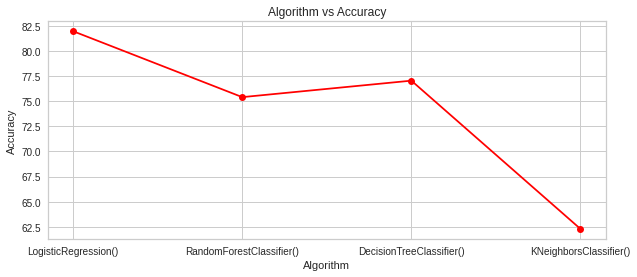

In [22]:
plt.figure(figsize=(10, 4))
plt.title("Algorithm vs Accuracy")
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.plot(list(d.keys()),list(d.values()),marker='o',color='red')
plt.show()

As shown in the above graph, logistic regression has the highest accuracy.

 So, Logistic Regression is the best classifier for our model.

Building a Predictive System for Logistic Regression Model #model1

In [23]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model1.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


We can compare models using PyCaret 

Install Pycaret

In [42]:
!pip install pycaret &> /dev/null
!pip install markupsafe==2.0.1
print ("Pycaret installed sucessfully!!")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.
Pycaret installed sucessfully!!


Get the version of the PyCaret

In [43]:
from pycaret.utils import version
version()

'2.3.10'

Parameters settings for all models

In [45]:
pip install numba==0.53

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.4 MB 5.0 MB/s 
     |████████████████████████████████| 25.3 MB 64.2 MB/s 
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.37.0
    Uninstalling llvmlite-0.37.0:
      Successfully uninstalled llvmlite-0.37.0
  Attempting uninstall: numba
    Found existing installation: numba 0.54.1
    Uninstalling numba-0.54.1:
      Successfully uninstalled numba-0.54.1


In [24]:
from pycaret.classification import *
s = setup(data=heart_data, target='target', silent=True)

# Other Parameters:
# train_size = 0.7
# data_split_shuffle = False

,Description,Value
0,session_id,3868
1,Target,target
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(303, 14)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,8
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='target',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_stra...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

Compare Models

In [25]:
cm = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8348,0.9043,0.8720,0.8500,0.8550,0.6650,0.6796,0.900
ridge,Ridge Classifier,0.8203,0.0000,0.8803,0.8235,0.8439,0.6353,0.6538,0.013
lda,Linear Discriminant Analysis,0.8203,0.9050,0.8894,0.8186,0.8458,0.6343,0.6535,0.015
rf,Random Forest Classifier,0.8017,0.8726,0.8538,0.8162,0.8261,0.5977,0.6186,0.460
et,Extra Trees Classifier,0.7963,0.8672,0.8258,0.8165,0.8147,0.5875,0.6017,0.457
lightgbm,Light Gradient Boosting Machine,0.7823,0.8563,0.8030,0.8242,0.8042,0.5612,0.5806,0.066
gbc,Gradient Boosting Classifier,0.7781,0.8495,0.8455,0.7852,0.8067,0.5497,0.5690,0.084
nb,Naive Bayes,0.7779,0.8687,0.7348,0.8536,0.7825,0.5591,0.5757,0.014
ada,Ada Boost Classifier,0.7779,0.8684,0.8121,0.8053,0.7992,0.5520,0.5702,0.092
dt,Decision Tree Classifier,0.7496,0.7531,0.7606,0.7942,0.7637,0.5007,0.5221,0.014


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=3868, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


As, shown above Logistic Regression is getting high accuarcy only. Now, we can create model and predict the values.